# Machine Learning Homework 1
## Ömercan Susam - 504162517

## Question 2a

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import groupby
from sklearn.feature_selection import VarianceThreshold

classNumber = 10
featureNumber = 64
trainingDataSet = np.loadtxt('./data/optdigits.tra', delimiter=',');
testDataSet = np.loadtxt('./data/optdigits.tes', delimiter=',');

trainingDataNumber = trainingDataSet.shape[0]
testDataNumber = testDataSet.shape[0]

# Find the ordering of the last column (in increasing order)
ind = np.argsort(trainingDataSet[:, 64])
# Return the matrix with rows in the specified order
trainingDataSet = trainingDataSet[ind]
trainingLabels = trainingDataSet[:, 64]
trainingData = trainingDataSet[:, 0:64]

# Find the ordering of the last column (in increasing order)
ind = np.argsort(testDataSet[:, 64])
# Return the matrix with rows in the specified order
testDataSet = testDataSet[ind]
testLabels = testDataSet[:, 64]
testData = testDataSet[:, 0:64]

# find variances
selector = VarianceThreshold()
selector.fit_transform(trainingData);
trainingDataVariances = np.array(selector.variances_)

# eliminate data with zero variances
trainingDataEliminated = trainingData[:,trainingDataVariances != 0];
testDataEliminated = testData[:,trainingDataVariances != 0];

numberOfEliminatedFeaturesTraining = trainingDataEliminated.shape[1]

meansOfClasses = np.zeros((classNumber,numberOfEliminatedFeaturesTraining));
priorProbOfClasses = np.zeros(classNumber);
covariance = np.zeros((numberOfEliminatedFeaturesTraining,numberOfEliminatedFeaturesTraining));
for x in range(0,classNumber):
    dataOfTheClass = np.array(trainingDataEliminated[(trainingLabels == x).ravel(),:]);
    meansOfClasses[x,:] = dataOfTheClass.mean(axis=0);
    priorProbOfClasses[x] = dataOfTheClass.shape[0]/trainingDataNumber;
    covariance = covariance + priorProbOfClasses[x] * np.cov(dataOfTheClass, rowvar=False);


\begin{align}
g_i(x) & = -\frac{1}{2} \sum\limits_{j=1}^d \Bigg(\frac{x_j^t - m_{ij}}{s_j}\Bigg)^2 + \log{\hat{P} (C_i)}
\end{align}

In [2]:
def naiveBias(sample, mean, comm_covar, priors, classID):
    sum = 0
    for x in range(0, len(sample)):
        sum = sum + (((sample[x] - mean[classID,x]))**2)/comm_covar[x,x];
    return  ((-1/2) * sum + math.log(priors[classID]));

In [3]:
results = np.zeros(testDataNumber);
for x in range (0,testDataNumber):
    nbPredict = float("-inf");
    for classID in range(0,classNumber):
        nbPost = naiveBias(testDataEliminated[x,:], meansOfClasses, covariance, priorProbOfClasses, classID);
        if (nbPost > nbPredict):
            nbPredict = nbPost
            results[x] = classID

correctClassifications = 0
for x in range(0,results.shape[0]):
    if(results[x] == testLabels[x]):
        correctClassifications += 1

correctRatio = correctClassifications / testDataNumber;
        
print("Naive bias test data accuracy: ")
print(float("%0.3f"%(100*(correctRatio))),"%")
print("Naive bias test data overall error: ")
print(float("%0.3f"%(100*(1-correctRatio))),"%")

Naive bias test data accuracy: 
89.316 %
Naive bias test data overall error: 
10.684 %


In [4]:
resultsTrain = np.zeros(trainingDataNumber);
for x in range (0,trainingDataNumber):
    nbPredict = float("-inf");
    for classID in range(0,classNumber):
        nbPost = naiveBias(trainingDataEliminated[x,:], meansOfClasses, covariance, priorProbOfClasses, classID);
        if (nbPost > nbPredict):
            nbPredict = nbPost
            resultsTrain[x] = classID

correctClassificationsTrain = 0
for x in range(0,resultsTrain.shape[0]):
    if(resultsTrain[x] == trainingLabels[x]):
        correctClassificationsTrain += 1

correctRatioTrain = correctClassificationsTrain / trainingDataNumber;
        
print("Naive bias training data accuracy: ")
print(float("%0.3f"%(100*(correctRatioTrain))),"%")
print("Naive bias training data overall error: ")
print(float("%0.3f"%(100*(1-correctRatioTrain))),"%")

Naive bias training data accuracy: 
91.42 %
Naive bias training data overall error: 
8.58 %


In [5]:
# class frequencies
freq = np.array([len(list(group)) for key, group in groupby(testLabels)])

matchingClassNumbers = np.zeros((classNumber))
freqResults = np.zeros((classNumber))
for x in range(0,classNumber):
    matchingClassIndex = (results == x) & (testLabels == x)
    matchingClassNumbers[x] = sum(matchingClassIndex)
    freqResults[x] = matchingClassNumbers[x] / freq[x]

# find results for accuracy
print("Class\t","Accuracy\t")
freqMatrix = np.zeros((classNumber,classNumber))
for x in range(0,classNumber):
    subsetOfMust = results[testLabels == x]
    for y in range(0,classNumber):
        freqMatrix[x,y] = sum(subsetOfMust == y)
    print(x,"\t",float("%0.3f"%(freqResults[x]*100)),"%\t")


Class	 Accuracy	
0 	 99.438 %	
1 	 74.176 %	
2 	 88.136 %	
3 	 86.339 %	
4 	 93.923 %	
5 	 94.505 %	
6 	 96.133 %	
7 	 96.648 %	
8 	 78.736 %	
9 	 85.0 %	


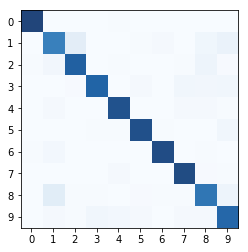

In [6]:
# confusion matrix calculation
confusionMatrix = np.zeros((classNumber,classNumber));
for x in range(0,testDataNumber):
    prediction = int(results[x]);
    actual = int(testLabels[x]);
    confusionMatrix[actual,prediction] = confusionMatrix[actual,prediction] + 1/freq[actual];

# plot confusion matrix
fig, ax1 = plt.subplots(1,1)
ax1.imshow(confusionMatrix, cmap='Blues', alpha=.9,interpolation='nearest')
ax1.set_xticks(np.arange(0, 10, 1))
ax1.set_yticks(np.arange(0, 10, 1))
plt.show()